***Data Collection & Processing***


In [106]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
df = pd.read_csv('/data.csv')

df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# New Section

In [79]:
# number of rows and columns in the dataset
df.shape

(569, 33)

In [80]:
# Some information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [60]:
# statistical measures about the data
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [81]:
# Checking for missing data

df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [82]:
# Checking if there duplicated value

df.duplicated().sum()

0

In [83]:
df.drop(['id', 'Unnamed: 32'], axis = 1, inplace = True)

In [84]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [85]:
# Get the count of malignant <M> and Benign <B> cells

df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [86]:
# Replace 'B' with 0 and 'M' with 1 in the 'diagnosis' column
df['diagnosis'] = df['diagnosis'].replace({'B': 0, 'M': 1})


In [87]:
df['diagnosis'].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

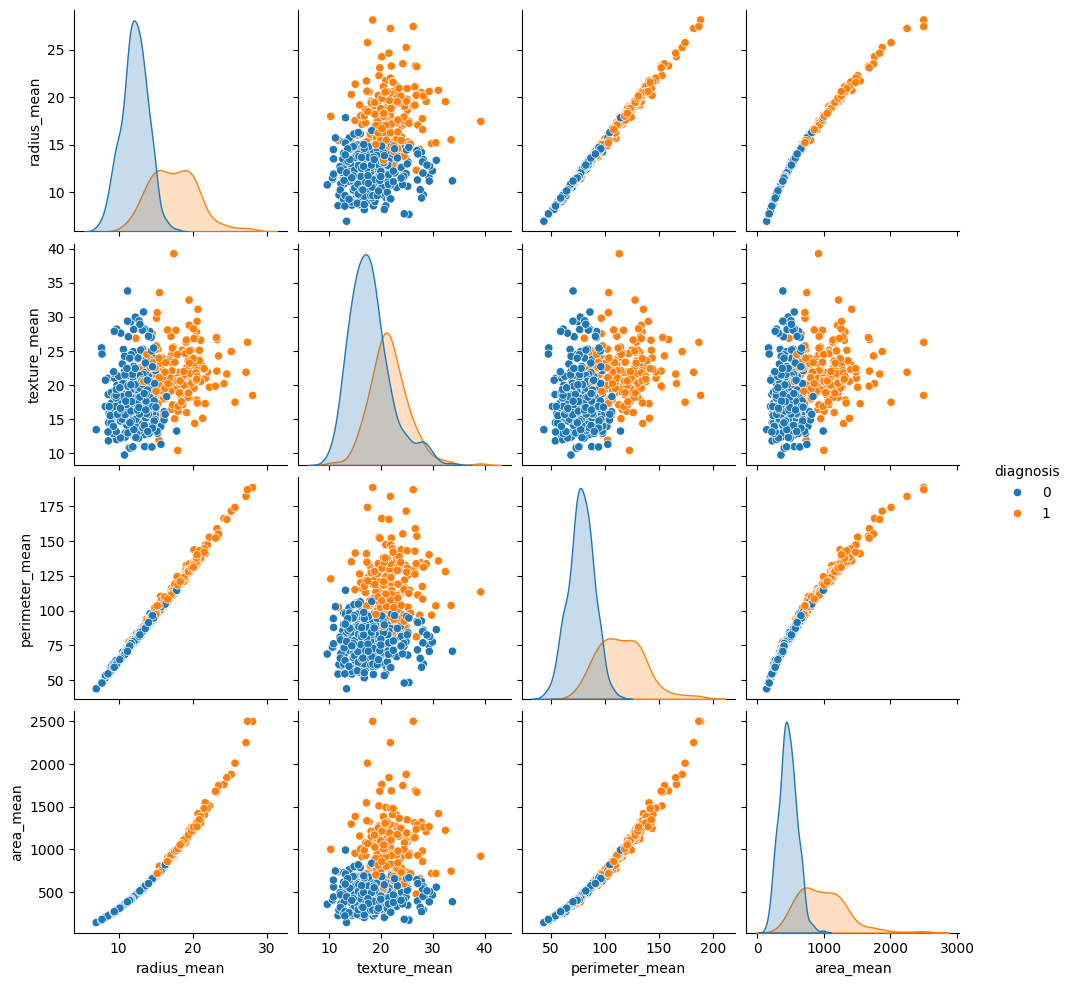

In [88]:
sns.pairplot(df.iloc[:,0:5],hue="diagnosis")

<Axes: >

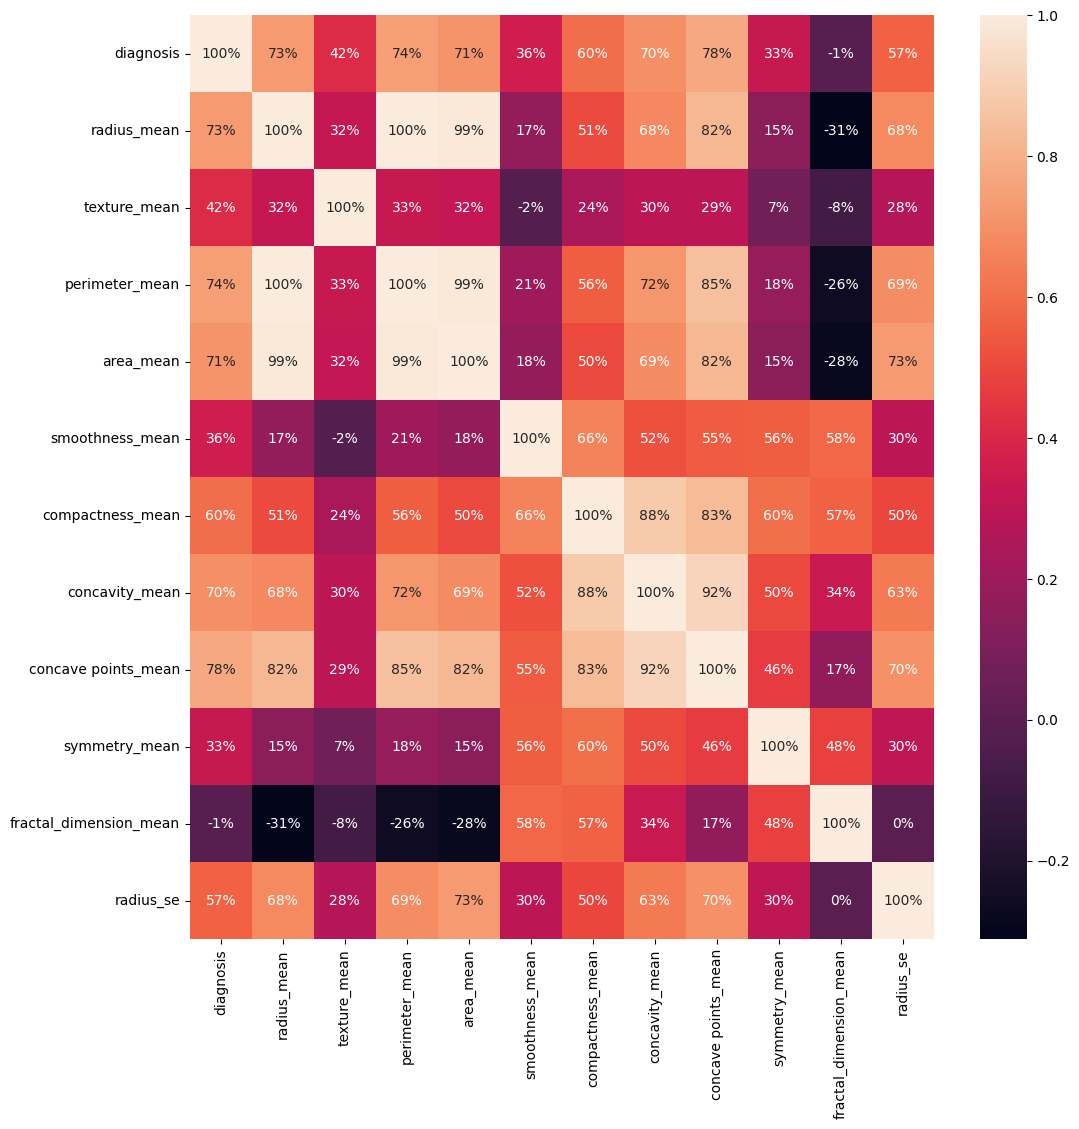

In [92]:
# visualize the correlation
plt.figure(figsize=(12,12))
sns.heatmap(df.iloc[:,0:12].corr(),annot=True,fmt=".0%")

***As we can see the significant difference between values of Benign & Malignant***  

**Separating the features and target**

**Splitting the data into Training & Testing **

In [134]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=30)

In [135]:
print(X.shape, X_train.shape, X_test.shape)

(569, 30) (455, 30) (114, 30)


**Model training using Logistic regression**

In [136]:
def models(X_train, Y_train):
    classifiers = [
        LogisticRegression(random_state=0),
        DecisionTreeClassifier(random_state=0, criterion="entropy"),
        RandomForestClassifier(random_state=0, criterion="entropy", n_estimators=10)
    ]

    results = []

    for i, clf in enumerate(classifiers):
        clf.fit(X_train, Y_train)
        accuracy = clf.score(X_train, Y_train)
        results.append((i, clf, accuracy))
        print(f'[{i}] {clf.__class__.__name__} accuracy: {accuracy}')

    return results


In [137]:
model=models(X_train,Y_train)

[0] LogisticRegression accuracy: 0.9538461538461539
[1] DecisionTreeClassifier accuracy: 1.0
[2] RandomForestClassifier accuracy: 0.9978021978021978


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [138]:
# Get the models
models_list = models(X_train, Y_train)

# Testing the models/results
for i, (_, clf, _) in enumerate(models_list):
    print("Model", i)
    print(classification_report(Y_test, clf.predict(X_test)))
    print('Accuracy : ', accuracy_score(Y_test, clf.predict(X_test)))

[0] LogisticRegression accuracy: 0.9538461538461539
[1] DecisionTreeClassifier accuracy: 1.0
[2] RandomForestClassifier accuracy: 0.9978021978021978
Model 0
              precision    recall  f1-score   support

           0       0.91      0.89      0.90        44
           1       0.93      0.94      0.94        70

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.92       114
weighted avg       0.92      0.92      0.92       114

Accuracy :  0.9210526315789473
Model 1
              precision    recall  f1-score   support

           0       0.90      0.82      0.86        44
           1       0.89      0.94      0.92        70

    accuracy                           0.89       114
   macro avg       0.90      0.88      0.89       114
weighted avg       0.90      0.89      0.89       114

Accuracy :  0.8947368421052632
Model 2
              precision    recall  f1-score   support

           0       0.93      0.89      0.91        44
  

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Model Evaluation**

**Building a Predictive System**

In [142]:
import numpy as np

# Pick any row from the data set to test the model manually
input_data = (13.03,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.02923,0.1467,0.05863,0.1839,2.342,1.17,14.16,0.004352,0.004899,0.01343,0.01164,0.02671,0.001777,13.3,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169)

# Change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the numpy array as we are predicting for one datapoint
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Retrieve the trained model from the list of models
trained_model = models_list[0][1]  # Assuming the first model in the list is the one you want to use

# Use the trained model to predict the class (benign or malignant) for the input data
prediction = trained_model.predict(input_data_reshaped)

# Map the predicted class to its label and print the prediction
if prediction[0] == 0:
    print('The tumor is predicted to be: Malignant')
else:
    print('The tumor is predicted to be: Benign')


The tumor is predicted to be: Benign


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
